In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("ClaimData.csv")

In [3]:
df.head(10)

,ClaimId,LineItemID,PetPolicyID,ItemDescription,DiagnosisOne,DiagnosisTwo,LineItemPrice,ClaimDateClosed,Condition
0,16980751,2073120,0,Freyja: Boarding (Canine 51-75 Lbs),Anal Gland Surgery,NaN,25.00,2019-10-02 15:33:00.0000000,NO COND
1,17856529,3193005,1,Axel: Biohazard Fee,Atopy,NaN,3.49,2020-06-29 14:28:00.0000000,ALLERGY (ALLERGIC)
2,17075791,392218,3,Kallie: Sedation (DexDomitor),ruptured CCL (right),NaN,142.22,2019-11-01 19:29:00.0000000,"CRUCIATE RUPTURE (ACL, CCL)"
3,16890631,977795,4,Kaiden: Scaling (Canine),Dental,NaN,84.25,2019-09-05 13:57:00.0000000,DENTAL DISEASE
4,17152945,1907072,5,Sadie Mae: Pain Management Level 2,TPLO,NaN,67.60,2019-11-26 07:43:00.0000000,"CRUCIATE RUPTURE (ACL, CCL)"
5,15151889,1314143,6,Boo: Exam-Emergency/consultation,ingested chicken wing bones,NaN,139.00,2017-11-22 12:58:00.0000000,NO COND
6,17416137,973999,7,Sadie: Examination,Lumps on Left side,NaN,52.00,2020-02-14 08:17:00.0000000,NO COND
7,13388833,426819,8,Reno: Consultation - Emergency -,Chocolate Ingestion,NaN,160.00,2014-12-26 10:36:00.0000000,NO COND
8,14701031,2463868,9,Hunter: Urinalysis Total,urine infection,NaN,77.60,2017-04-21 05:46:00.0000000,URINARY TRACT INFECTION
9,15445102,2650859,10,Millie: Enrofloxacin 50mg Tab,renal failure and neurologic disease,NaN,94.88,2018-03-29 16:43:00.0000000,KIDNEY DISEASE


In [4]:
df['ClaimId'].nunique()

87829

In [5]:
df['LineItemID'].nunique()

98057

In [6]:
df['Condition'].nunique()

21

In [7]:
df['DiagnosisOne'].nunique()

45146

In [8]:
df['DiagnosisOne'].isnull().sum()

9

In [9]:
df['DiagnosisTwo'].isnull().sum()

92980

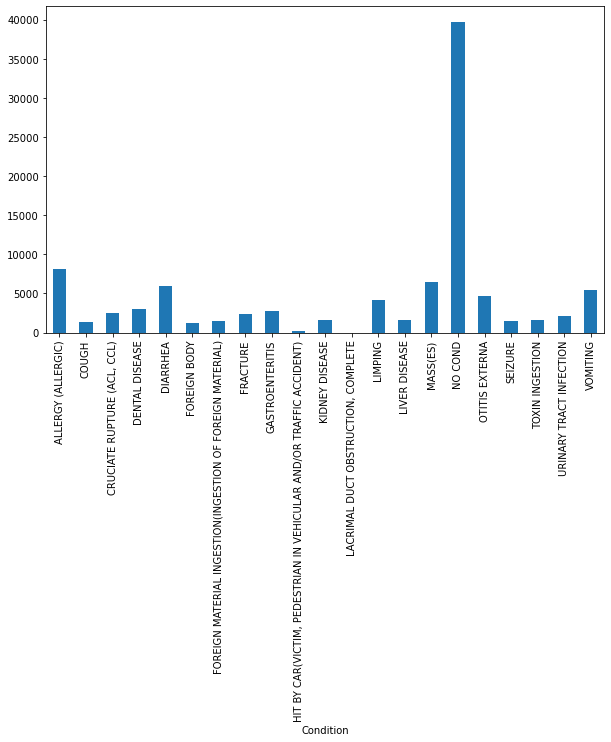

In [10]:
fig = plt.figure(figsize=(10,6))
df.groupby('Condition').DiagnosisOne.count().plot.bar(ylim=0)
plt.show()

In [11]:
col = ['ItemDescription', 'DiagnosisOne', 'Condition']
df_id = df[col]
df_id = df_id[pd.notnull(df_id['DiagnosisOne'])]

In [12]:
df_id['Condition_ID'] = df_id['Condition'].factorize()[0]

In [13]:
df_id

,ItemDescription,DiagnosisOne,Condition,Condition_ID
0,Freyja: Boarding (Canine 51-75 Lbs),Anal Gland Surgery,NO COND,0
1,Axel: Biohazard Fee,Atopy,ALLERGY (ALLERGIC),1
2,Kallie: Sedation (DexDomitor),ruptured CCL (right),"CRUCIATE RUPTURE (ACL, CCL)",2
3,Kaiden: Scaling (Canine),Dental,DENTAL DISEASE,3
4,Sadie Mae: Pain Management Level 2,TPLO,"CRUCIATE RUPTURE (ACL, CCL)",2
...,...,...,...,...
98052,Izzy: Consultation - Regular,diarrhea,NO COND,0
98053,Cristophe (Baby Boy): KEPPA XR 750mg TABLET,Keppra XR,SEIZURE,12
98054,Chloe: Simplicef 200mg tab,Dermatitis/Allergies,ALLERGY (ALLERGIC),1
98055,Louie: Urine Specific Gravity,Ibuprofen Toxicity Continued,TOXIN INGESTION,17


In [14]:
desc = df_id['DiagnosisOne'] +' ' + df_id['ItemDescription']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(desc, df_id['Condition'], test_size= 0.20, random_state = 5)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

X_train_tfidf = TfidfTransformer().fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [16]:
X_test_dtm = count_vect.transform(X_test)

In [17]:
y_pred_class = clf.predict(X_test_dtm)

In [18]:
print(metrics.classification_report(y_test, y_pred_class))

                                                                     precision    recall  f1-score   support

                                                 ALLERGY (ALLERGIC)       0.75      0.72      0.73      1622
                                                              COUGH       1.00      0.22      0.37       258
                                        CRUCIATE RUPTURE (ACL, CCL)       0.91      0.52      0.66       541
                                                     DENTAL DISEASE       0.88      0.69      0.78       600
                                                           DIARRHEA       0.68      0.65      0.66      1193
                                                       FOREIGN BODY       0.57      0.12      0.19       243
          FOREIGN MATERIAL INGESTION(INGESTION OF FOREIGN MATERIAL)       0.57      0.17      0.26       305
                                                           FRACTURE       0.96      0.54      0.69       500
                  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(desc, df_id['Condition'], test_size= 0.2, random_state = 5)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

X_train_tfidf = TfidfTransformer().fit_transform(X_train_counts)


In [20]:
rnd = RandomForestClassifier().fit(X_train_tfidf, y_train)

In [21]:
X_test_dtm = count_vect.transform(X_test)

y_pred_class = rnd.predict(X_test_dtm)

print(metrics.classification_report(y_test, y_pred_class))

                                                                     precision    recall  f1-score   support

                                                 ALLERGY (ALLERGIC)       0.80      0.76      0.78      1622
                                                              COUGH       0.88      0.75      0.81       258
                                        CRUCIATE RUPTURE (ACL, CCL)       0.82      0.74      0.78       541
                                                     DENTAL DISEASE       0.83      0.83      0.83       600
                                                           DIARRHEA       0.79      0.80      0.80      1193
                                                       FOREIGN BODY       0.50      0.37      0.42       243
          FOREIGN MATERIAL INGESTION(INGESTION OF FOREIGN MATERIAL)       0.51      0.30      0.38       305
                                                           FRACTURE       0.89      0.77      0.83       500
                  

In [22]:
df2 = pd.read_csv('Holdout.csv')

In [23]:
df2.head()

,ClaimId,LineItemID,PetPolicyID,ItemDescription,DiagnosisOne,DiagnosisTwo,LineItemPrice,ClaimDateClosed,Condition
0,19089584,969409,14770,Duc: Office Inject - analgesic,Preventative,Owner is requesting that we submit a claim for...,49.75,2021-05-20 17:14:00.0000000,NaN
1,19499370,3929062,61921,Sam: DVM Inpatient Examination,Hemorrhagic gastroenteritis,NaN,51.00,2021-08-26 12:02:00.0000000,NaN
2,19403436,2344322,50821,Jax: PD Hill's Canine I/D 8.5lbs - bag,"coughing, diarrhea",NaN,44.43,2021-08-03 11:48:00.0000000,NaN
3,19369542,1634713,12166,Brody: Metacam Injection Per ml,Lumpectomy,NaN,22.00,2021-07-26 09:41:00.0000000,NaN
4,18957207,920017,47937,Tango: Exam/Consultation Emergency,labored breathing /recumbent,NaN,174.17,2021-04-18 09:22:00.0000000,NaN


In [24]:
df2['DiagnosisOne'].isnull().sum()

1

In [25]:
df2 = df2[pd.notnull(df2['DiagnosisOne'])]

In [26]:
new_input = df2['DiagnosisOne']

In [27]:
new_output = rnd.predict(count_vect.transform(new_input))

In [28]:
df2['Condition'] = new_output

In [29]:
df2

,ClaimId,LineItemID,PetPolicyID,ItemDescription,DiagnosisOne,DiagnosisTwo,LineItemPrice,ClaimDateClosed,Condition
0,19089584,969409,14770,Duc: Office Inject - analgesic,Preventative,Owner is requesting that we submit a claim for...,49.75,2021-05-20 17:14:00.0000000,NO COND
1,19499370,3929062,61921,Sam: DVM Inpatient Examination,Hemorrhagic gastroenteritis,NaN,51.00,2021-08-26 12:02:00.0000000,GASTROENTERITIS
2,19403436,2344322,50821,Jax: PD Hill's Canine I/D 8.5lbs - bag,"coughing, diarrhea",NaN,44.43,2021-08-03 11:48:00.0000000,DIARRHEA
3,19369542,1634713,12166,Brody: Metacam Injection Per ml,Lumpectomy,NaN,22.00,2021-07-26 09:41:00.0000000,MASS(ES)
4,18957207,920017,47937,Tango: Exam/Consultation Emergency,labored breathing /recumbent,NaN,174.17,2021-04-18 09:22:00.0000000,NO COND
...,...,...,...,...,...,...,...,...,...
4995,18903748,3084317,16855,PIKE: Biohazardous waste disposal-Sharps,Heart disease,NaN,0.54,2021-04-05 14:16:00.0000000,NO COND
4996,19176392,1108886,13861,Millie: Midazolam 5 mg/ml Inj (ml),MRI,NaN,42.69,2021-06-11 08:14:00.0000000,SEIZURE
4997,19450426,3924884,21444,Riley: Seresto for Large Dogs,Skin rash/ infection,NaN,62.49,2021-08-26 10:02:00.0000000,NO COND
4998,18957005,2326545,30320,Dudu: Exam/Consultation Medical Condition,"Vomiting, diarhea",NaN,97.78,2021-04-18 06:23:00.0000000,VOMITING


In [30]:
df2['Condition'].nunique()

20

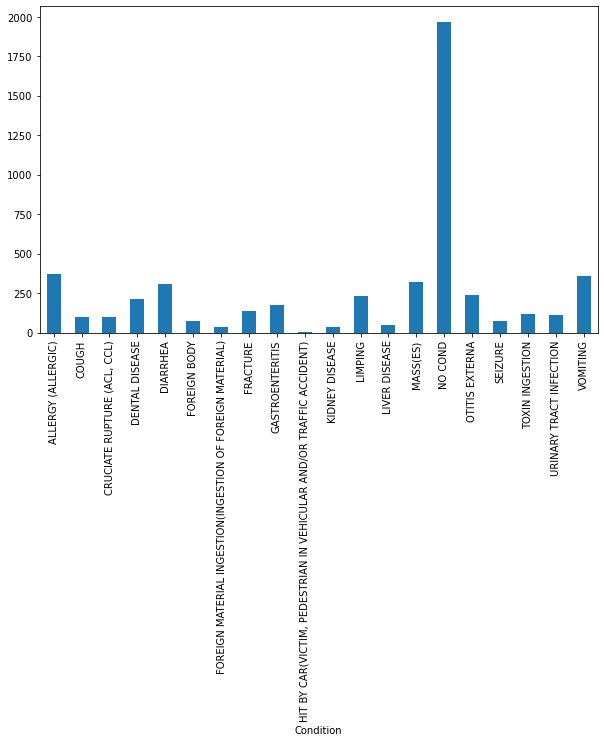

In [31]:
fig = plt.figure(figsize=(10,6))
df2.groupby('Condition').DiagnosisOne.count().plot.bar(ylim=0)
plt.show()

In [32]:
# Random manual check for "UTI" in both datasets discovered that a lot of simple descriptions in column "DiagnosisOne"
# didn't correspond to the "Urinary Tract Infection" in the original dataset. It is beyond the scope of this
# assignment, but as a first step before making predictive models I would make sure to ask questions and understand
# reason behind discrepancies in the original dataset.

In [33]:
df2.to_csv('Holdout_Prediction.csv', index=None)